In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
import json
import pprint

import networkx as nx
import nxviz as nv  
from nxviz import annotate

### Load Cleaned Data

In [38]:
with open('reddit_reply_to_t3_1i0nukq.json') as f:
    data = json.load(f)

### Load Node Bot Prob

In [49]:
bot_df = pd.read_csv('reddit_averaged_bot_prob.csv')

In [50]:
bot_df[:10]

,author_fullname,botprobability,thr_50,thr_60,thr_70,thr_80,thr_90
0,t2_1001os,0.752688,True,True,True,False,False
1,t2_1001ql,0.752943,True,True,True,False,False
2,t2_1001qx,0.419376,False,False,False,False,False
3,t2_1007qfi3ai,0.086045,False,False,False,False,False
4,t2_100an3,0.752943,True,True,True,False,False
5,t2_100kw1,0.743840,True,True,True,False,False
6,t2_100o38,0.415059,False,False,False,False,False
7,t2_100qos,0.419610,False,False,False,False,False
8,t2_100wqb,0.419610,False,False,False,False,False
9,t2_1013avwpi9,0.419610,False,False,False,False,False


In [69]:
thr_50 = dict()
thr_60 = dict()
thr_70 = dict()
thr_80 = dict()
thr_90 = dict()
for index, row in bot_df.iterrows():
    thr_50[row['author_fullname']] = row['thr_50']
    thr_60[row['author_fullname']] = row['thr_60']
    thr_70[row['author_fullname']] = row['thr_70']
    thr_80[row['author_fullname']] = row['thr_80']
    thr_90[row['author_fullname']] = row['thr_90']

### Construct Edge List

In [39]:
edge_list = []
for key, values in data.items():
    iter_lst = [(key, val) for val in values]
    edge_list.extend(iter_lst)
edge_list[:10]

[('t2_9a7co', 't2_azbuqzix'),
 ('t2_o1jtvc6rk', 't2_azbuqzix'),
 ('t2_o1jtvc6rk', 't2_5uj11eb9'),
 ('t2_o1jtvc6rk', 't2_1eb6ss9z6j'),
 ('t2_o1jtvc6rk', 't2_64ix18fn'),
 ('t2_o1jtvc6rk', 't2_vlafa4rvv'),
 ('t2_o1jtvc6rk', 't2_64ix18fn'),
 ('t2_o1jtvc6rk', 't2_64ix18fn'),
 ('t2_o1jtvc6rk', 't2_64ix18fn'),
 ('t2_o1jtvc6rk', 't2_64ix18fn')]

In [40]:
user_lst = list(data.keys())

In [41]:
len(user_lst)

1598

In [42]:
len(edge_list)

2241

In [43]:
weight_list = []
for x in set(edge_list):
    tpl = tuple(list(x) + [edge_list.count(x)])
    weight_list.append(tpl)
weight_list[:10]

[('t2_3utxm', 't2_azbuqzix', 1),
 ('t2_3y8mgl0u', 't2_azbuqzix', 1),
 ('t2_s5lapownl', 't2_17f4c9aq74', 1),
 ('t2_n8fb0ch', 't2_azbuqzix', 1),
 ('t2_5g5tkk4x', 't2_640hh', 1),
 ('t2_s8cgbjz9c', 't2_azbuqzix', 1),
 ('t2_pm6r08bij', 't2_azbuqzix', 1),
 ('t2_j7xqs', 't2_azbuqzix', 1),
 ('t2_8sh6v', 't2_tyq1c', 1),
 ('t2_8fh2xhwj', 't2_12y6xmrtje', 1)]

### Visualize Network

In [44]:
G1 = nx.DiGraph()
G1.add_nodes_from(user_lst)
G1.add_weighted_edges_from(weight_list)

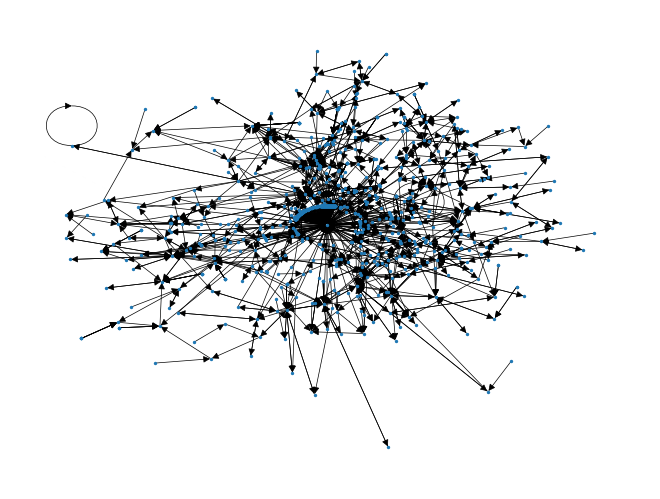

<Figure size 640x480 with 0 Axes>

In [46]:
pos = nx.kamada_kawai_layout(G1)
nx.draw(G1, pos, node_size = 2, width = 0.5)
plt.figure()
plt.show()

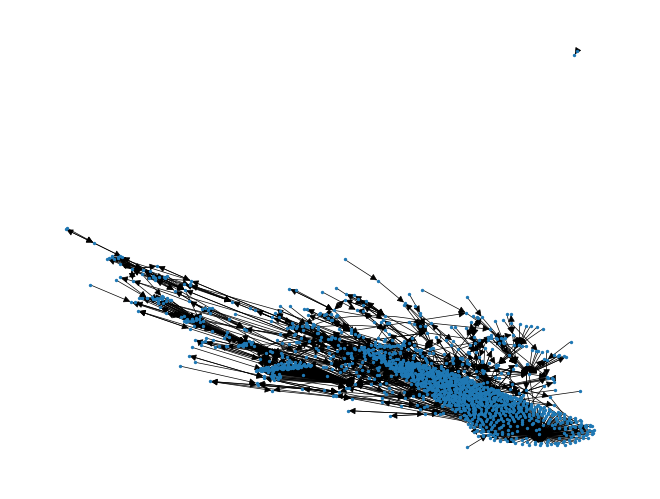

<Figure size 640x480 with 0 Axes>

In [45]:
pos = nx.spring_layout(G1)
nx.draw(G1, pos, node_size = 2, width = 0.5)
plt.figure()
plt.show()

In [30]:
G1.out_degree

OutDegreeView({'t2_mm7m0ccve': 3, 't2_oxub5tnr': 1, 't2_1kbebmiu': 1, 't2_9ourbvb': 1, 't2_u67rd0zep': 1, 't2_29iwtb62': 2, 't2_1cdvprap1d': 1, 't2_v9d2cnx4': 1, 't2_nhku54oy5': 9, 't2_tfejom8gc': 2, 't2_42gedjvv': 1, 't2_4140kyai': 3, 't2_sz3xedst': 1, 't2_ruj6avkh': 1, 't2_xntys': 1, 't2_5uvd2idm': 1, 't2_7bsnr8w3': 1, 't2_zyey9': 1, 't2_10ixnsyzhm': 1, 't2_w0eb509c': 1, 't2_9qth8gzn': 1, 't2_bl7qvhzk': 1, 't2_671ljczt': 2, 't2_smf1qihpc': 1, 't2_c9aojh9p': 1, 't2_1anqfaaqto': 1, 't2_4e3xjlq1': 1, 't2_ye3baij': 1, 't2_3iob4q00': 1, 't2_1hhsklhfbg': 2, 't2_umh9m4c3v': 1, 't2_84qqvx0z': 1, 't2_1fnw083m1x': 1, 't2_elqzuzmq': 1, 't2_brfo7sxm9': 2, 't2_vdi1zksh6': 1, 't2_70v8vmo': 7, 't2_et93i6rsc': 3, 't2_d7gp4qlt': 1, 't2_3vb2c4gt': 1, 't2_bl1o74cv': 1, 't2_896vsymd': 1, 't2_4w1o340l': 1, 't2_b9dm7kvp': 1, 't2_j6asa': 1, 't2_14pmw7diy5': 1, 't2_62dwji3e': 1, 't2_4ukze5bs': 1, 't2_afb7thbk': 1, 't2_l39uj5h5': 1, 't2_1idz8kov': 1, 't2_83x6mavq': 1, 't2_is0q0ow18': 1, 't2_129v6w95jh': 1, '

In [34]:
betweenness_dict = nx.betweenness_centrality(G1, k=5000, normalized=True, weight= None, endpoints=False, seed=0)


In [35]:
from collections import Counter

k = Counter(betweenness_dict)
 
# Finding 3 highest values
high = k.most_common(10) 
 
print("Initial Dictionary:")
print(betweenness_dict, "\n")
 
print("Dictionary with 10 highest values:")
print("Keys: Values")
 
for i in high:
    print(i[0]," :",i[1]," ")

Initial Dictionary:
{'t2_mm7m0ccve': 0.00024297872043889913, 't2_oxub5tnr': 0.00026995123281133146, 't2_1kbebmiu': 8.002725165882918e-05, 't2_9ourbvb': 0.00016006884640425373, 't2_u67rd0zep': 0.0001000358574593609, 't2_29iwtb62': 7.193057927574663e-05, 't2_1cdvprap1d': 3.424053347478089e-05, 't2_v9d2cnx4': 0.00018946819586355162, 't2_nhku54oy5': 0.00028949010252586507, 't2_tfejom8gc': 0.0, 't2_42gedjvv': 0.0, 't2_4140kyai': 0.017405003691757164, 't2_sz3xedst': 0.0, 't2_ruj6avkh': 0.0, 't2_xntys': 0.0, 't2_5uvd2idm': 0.0, 't2_7bsnr8w3': 2.0015777343829396e-05, 't2_zyey9': 0.0, 't2_10ixnsyzhm': 0.0, 't2_w0eb509c': 0.0, 't2_9qth8gzn': 0.0, 't2_bl7qvhzk': 0.0, 't2_671ljczt': 4.217370916985615e-05, 't2_smf1qihpc': 4.001721160106343e-05, 't2_c9aojh9p': 0.0, 't2_1anqfaaqto': 0.0, 't2_4e3xjlq1': 0.0, 't2_ye3baij': 0.0, 't2_3iob4q00': 6.0011474314999785e-05, 't2_1hhsklhfbg': 2.0022948887127078e-05, 't2_umh9m4c3v': 0.0, 't2_84qqvx0z': 0.0, 't2_1fnw083m1x': 0.0, 't2_elqzuzmq': 0.0, 't2_brfo7sxm9'

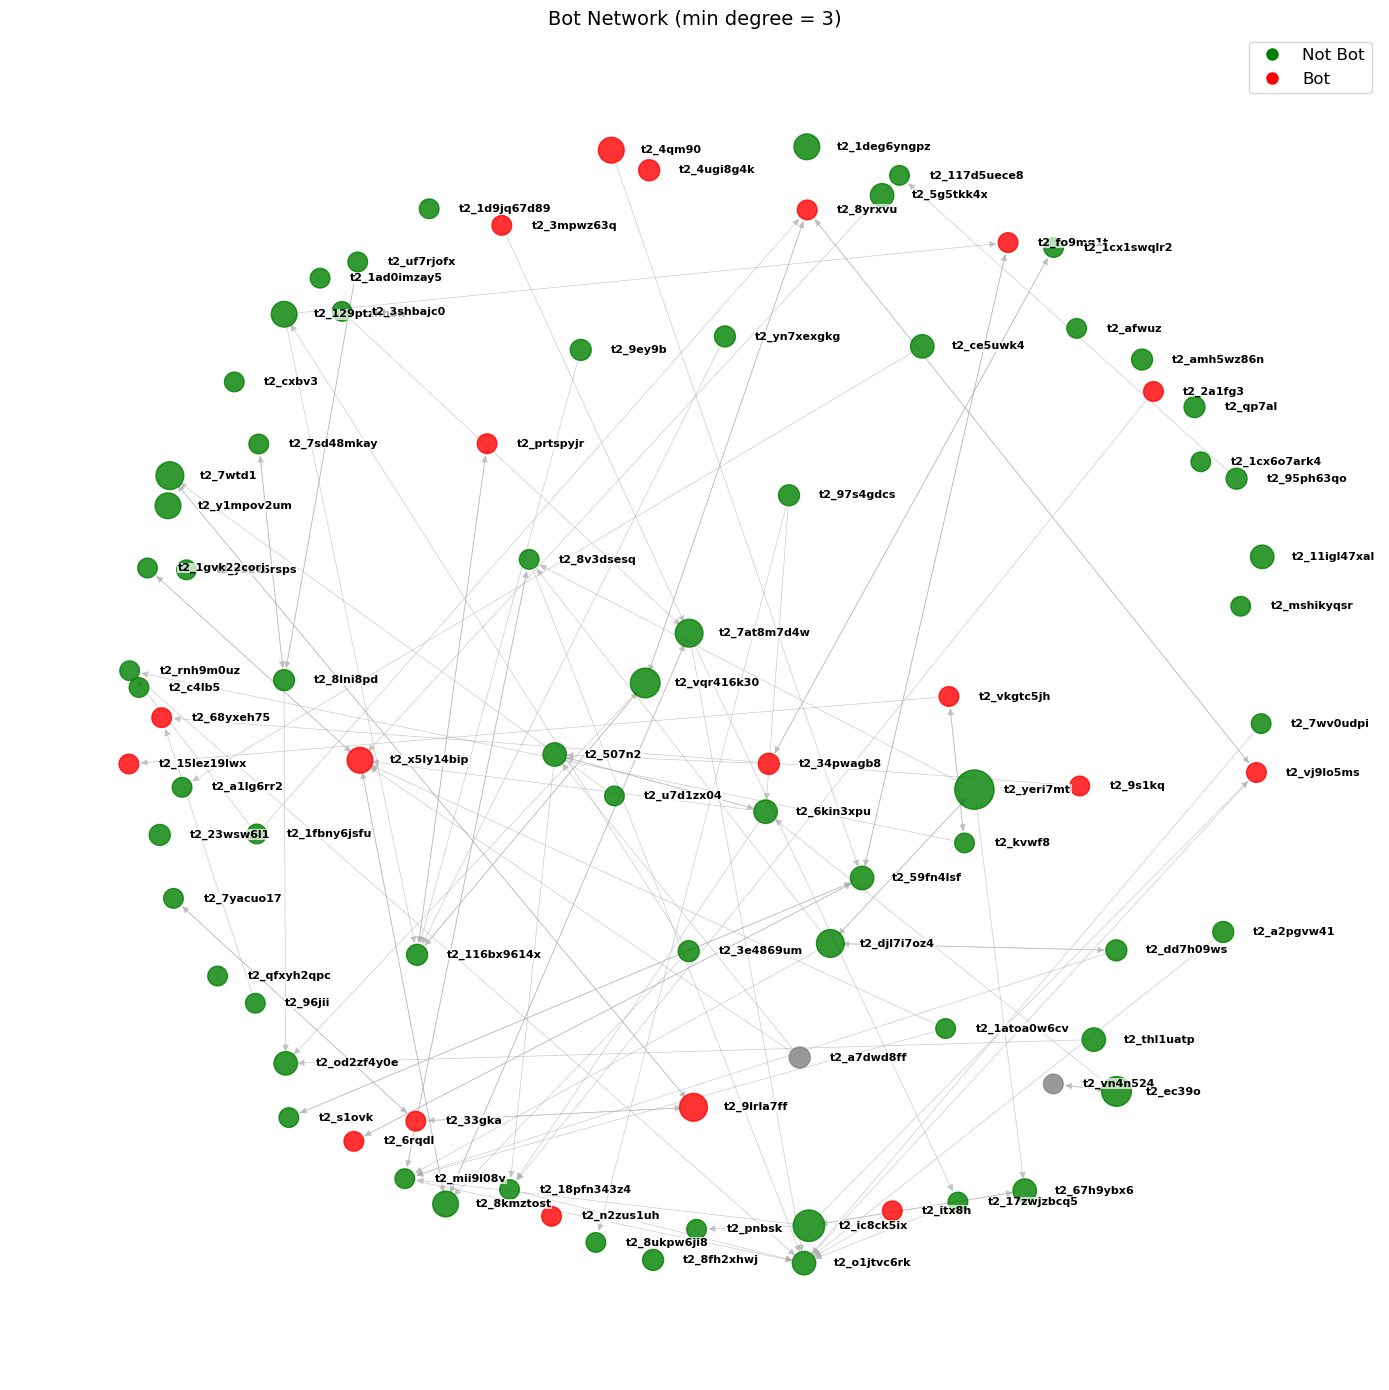

In [72]:
#out degree
def plot_country_network(user_lst, weight_list, bot_classification, min_degree=1, seed=10000001):
    # Set random seed for reproducibility
    np.random.seed(seed)

    # Create directed network graph from node list and weighted edge list
    G = nx.DiGraph()
    G.add_nodes_from(user_lst)
    G.add_weighted_edges_from(weight_list) # Create a directed graph

    #G.remove_edges_from(list(G.selfloop_edges()))
    G.remove_edges_from([(u, v) for u, v in G.edges() if u == v])
    
    # Calculate node in-degrees and out-degrees
    in_degrees = dict(G.in_degree())
    out_degrees = dict(G.out_degree())
    
    # Filter nodes based on degree (keeping all nodes as requested)
    # Note: We keep min_degree parameter for flexibility, but default to 0
    nodes_to_remove = [node for node, degree in out_degrees.items() if degree < min_degree]
    G.remove_nodes_from(nodes_to_remove)
    
        
    max_in_degree = max(in_degrees.values())
    max_out_degree = max(out_degrees.values())
    
    # Keep original node size calculation, but introduce a min_size to ensure visibility
    min_size = 200  # Minimum node size
    normalized_in_degrees = {node: max(min_size, (deg / max_in_degree) * 800)
                             for node, deg in in_degrees.items()}
    normalized_out_degrees = {node: max(min_size, (deg / max_out_degree) * 800)
                             for node, deg in out_degrees.items()}
    
    # Get node colors based on bot classification
    node_colors = []
    for node in G.nodes():
        try:
            if bot_classification[node]:
                node_colors.append('Red')  # Bots are red
            else:
                node_colors.append('Green')  # Non-bots are green
        except KeyError:
            # If node not in classification dict, use a default color
            node_colors.append('gray')
    
    # Create the plot
    plt.figure(figsize=(14, 14))  # Larger figure for better visibility
    
    # Choose layout with more space
    pos = nx.spring_layout(G, k=1.8, iterations=100)
    
    # Draw the edges first
    nx.draw_networkx_edges(G, 
                          pos=pos, 
                          edge_color="darkgrey", 
                          width=0.5,
                          alpha=0.6, 
                          arrows=True)  # Draw arrows to indicate direction
    
    # Draw the nodes
    nx.draw_networkx_nodes(G,
                          pos=pos,
                          node_color=node_colors,
                          node_size=[normalized_out_degrees.get(node, 0) for node in G.nodes()],
                          alpha=0.8)
    
    # Draw labels with a positioning strategy that avoids covering nodes
    # Calculate offset based on node size
    label_pos = {}
    for node in G.nodes():
        # Position labels to the right of nodes
        base_pos = pos[node]
        node_size_factor = normalized_out_degrees.get(node, 0) / 10000  # Scale factor
        offset = max(0.05, node_size_factor * 0.1)  # Min offset of 0.05
        label_pos[node] = (base_pos[0] + offset, base_pos[1])
    
    nx.draw_networkx_labels(G, 
                           label_pos, 
                           font_size=8,
                           font_color="black",
                           font_weight="bold",
                           horizontalalignment='left',
                           bbox={"facecolor": "white", 
                                 "edgecolor": "none",
                                 "alpha": 0.7,
                                 "pad": 0.2})
    
    # Add a legend
    green_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Not Bot')
    orange_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Bot')
    plt.legend(handles=[green_patch, orange_patch], loc='upper right', fontsize=12)
    
    plt.title(f"Bot Network (min degree = {min_degree})", fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    
    return plt

plot = plot_country_network(user_lst, weight_list, thr_50, min_degree = 3)
plot.show()